In [2]:
import sys
sys.path.insert(1, '../')
import numpy as np
import util.io as io
import matplotlib.pyplot as plt
from nufft import *
from util.fft import *
from scipy import interpolate
from tqdm.notebook import tqdm

In [5]:
gridsize = 256
trajectory = np.load("../lib/nufft_trajectory.npy")
data = np.load("../lib/nufft_data.npy")

In [6]:
ns = len(trajectory)
dcf = pipedcf(trajectory, ns)
mat = np.zeros([gridsize, gridsize], dtype=complex)
mat = gridding(mat, data, trajectory, dcf)

  0%|          | 0/10 [00:00<?, ?it/s]

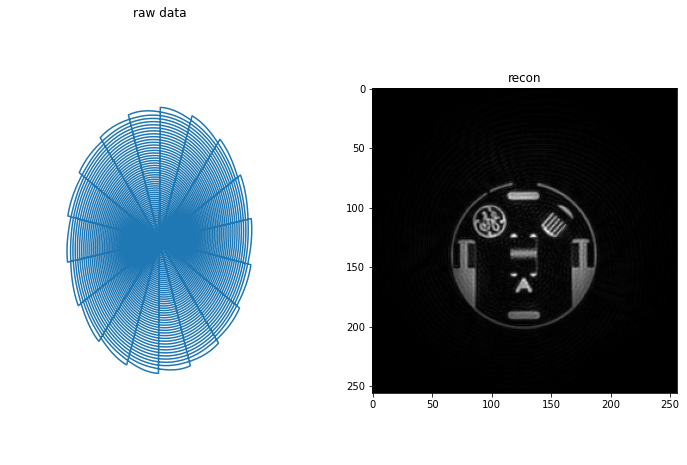

In [26]:
plt.figure(figsize =(12,8))
plt.subplot(1,2,1) 
plt.title("raw data")
plt.plot(trajectory[:,0], trajectory[:,1])
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.axis('off')
plt.subplot(1,2,2)
plt.title("recon")
plt.imshow(np.abs(((ifft2c(mat)))), cmap ="gray")
plt.gca().set_aspect('equal')